# **IPL Cricket Match Win Probability Prediction using Machine Learning (Lgbm Classifier)**

# **Importing required libraries**

In [2]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression  # Importing Logistic regression classifier
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score
# Importing LightGBM library
import lightgbm as lgb  # Light Gradient Boosting Machine library
# Importing XGBoost library
import xgboost as xgb

# **Importing our dataset**

In [3]:
# Reading the CSV file 'ipl.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv('./data/team_performance_dataset_2008to2024.csv')
# Displaying the first 5 rows of the dataset
data.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [4]:
# Displaying the last 5 rows of the dataset
data.tail(5)

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
1068,1426283,2024-04-28,Gujarat Titans vs Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,wickets,9.0,200,206.0,WG Jacks,Nitin Menon,VK Sharma,J Srinath,42,106,52
1069,1426284,2024-04-28,Chennai Super Kings vs Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,field,Chennai Super Kings,runs,78.0,212,134.0,RD Gaikwad,R Pandit,MV Saidharshan Kumar,Sanjay Verma,50,109,53
1070,1426285,2024-04-29,Delhi Capitals vs Kolkata Knight Riders,"Eden Gardens, Kolkata",Delhi Capitals,bat,Kolkata Knight Riders,wickets,7.0,153,157.0,CV Varun,Navdeep Singh,Tapan Sharma,V Narayan Kutty,67,61,25
1071,1426286,2024-04-30,Mumbai Indians vs Lucknow Super Giants,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,field,Lucknow Super Giants,wickets,4.0,144,145.0,MP Stoinis,MA Gough,UV Gandhe,DS Manohar,28,78,38
1072,1426287,2024-05-01,Chennai Super Kings vs Punjab Kings,"MA Chidambaram Stadium, Chepauk, Chennai",Punjab Kings,field,Punjab Kings,wickets,7.0,162,163.0,Harpreet Brar,HAS Khalid,VK Sharma,R Seth,55,56,51


# **Understanding our data**

In [5]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (1073, 18)


In [6]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Match_ID              1073 non-null   int64  
 1   Date                  1073 non-null   object 
 2   Teams                 1073 non-null   object 
 3   Venue                 1073 non-null   object 
 4   Toss_Winner           1073 non-null   object 
 5   Toss_Decision         1073 non-null   object 
 6   Match_Winner          1073 non-null   object 
 7   Win_Type              1054 non-null   object 
 8   Win_Margin            1054 non-null   float64
 9   First_Innings_Score   1073 non-null   int64  
 10  Second_Innings_Score  1070 non-null   float64
 11  Player_of_Match       1068 non-null   object 
 12  Umpire                1073 non-null   object 
 13  Umpire1               1073 non-null   object 
 14  Umpire2               1073 non-null   object 
 15  Powerplay_Scores     

In [7]:
# Displaying the columns in our dataset
data.columns

Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores'],
      dtype='object')

### **Column Description**

- 'id': Unique identifier for each match.

- 'city': City where the match was played.

- 'date': Date of the match.

- 'player_of_match': Name of the player who was awarded "Player of the Match."

- 'venue': Stadium or venue where the match was played.

- 'neutral_venue': Binary indicator (0 or 1) indicating if the match was played on a neutral venue (1) or not (0).

- 'team1': Name of the first team participating in the match.

- 'team2': Name of the second team participating in the match.

- 'toss_winner': Name of the team that won the toss.

- 'toss_decision': Decision taken by the toss-winning team (either 'field' or 'bat').

- 'winner': Name of the team that won the match.

- 'result': The result of the match (e.g., 'runs', 'wickets', 'tie', etc.).

- 'result_margin': The margin by which the winning team won the match (e.g., runs or wickets).

- 'eliminator': Binary indicator (0 or 1) indicating if the match was decided by an eliminator (1) or not (0).

- 'method': The method used to decide the match (e.g., Duckworth-Lewis, etc.).

- 'umpire1': Name of the first on-field umpire.

- 'umpire2': Name of the second on-field umpire.

In [8]:
# Get unique values in the 'team1' column
data['Teams'].unique()
data[['team1', 'team2']] = data['Teams'].str.split(' vs ', expand=True)

In [9]:
# Get unique values in the 'team1' column
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [10]:
# Get unique values in the 'team2' column
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
# Get unique values in the 'winner' column
data['Match_Winner'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Draw/No Result', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
# Get unique values in the 'toss_winner' column
data['Toss_Winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [13]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.Match_Winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.Toss_Winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'Winner', and 'Toss_Winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.Match_Winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.Toss_Winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

#
data.team1.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.team2.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.Match_Winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.Toss_Winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'Toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.Match_Winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.Toss_Winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'Winner', and 'Toss_Winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.Match_Winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.Toss_Winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/1428589011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/1428589011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

The above code is used to standardize and clean up the team names in the dataset. There are inconsistencies in the team names, and some teams have multiple variations in their names, such as "Rising Pune Supergiant" as "Rising Pune Supergiants," "Sunrisers Hyderabad" as "Deccan Chargers" and "Delhi Capitals" as "Delhi Daredevils".

By performing these replacements, we ensure that all team names are consistent and represented with the correct name throughout the dataset. This is important because when building models or performing data analysis, having consistent and clean data is crucial for accurate and meaningful results.

In [14]:
print(data['team1'].unique())
# To show statistical summary of the columns of our data
data.describe(include ='all')

['Royal Challengers Bengaluru' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Punjab Kings'
 'Lucknow Super Giants' 'Gujarat Titans']


,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,team1,team2
count,1.073000e+03,1073,1073,1073,1073,1073,1073,1054,1054.000000,1073.000000,1070.000000,1068,1073,1073,1073,1073.000000,1073.000000,1073.000000,1073,1073
unique,NaN,803,211,58,14,2,15,2,NaN,NaN,NaN,289,62,62,30,NaN,NaN,NaN,14,14
top,NaN,2016-05-21,Chennai Super Kings vs Mumbai Indians,Eden Gardens,Mumbai Indians,field,Mumbai Indians,wickets,NaN,NaN,NaN,AB de Villiers,AK Chaudhary,S Ravi,J Srinath,NaN,NaN,NaN,Royal Challengers Bengaluru,Mumbai Indians
freq,NaN,2,22,77,139,689,141,569,NaN,NaN,NaN,25,113,83,203,NaN,NaN,NaN,140,134
mean,8.941365e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.158444,165.164958,151.918692,NaN,NaN,NaN,NaN,46.074557,78.248835,40.841566,NaN,NaN
std,3.637486e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.762303,31.904238,31.751666,NaN,NaN,NaN,NaN,12.007306,18.604148,14.228121,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,56.000000,2.000000,NaN,NaN,NaN,NaN,15.000000,0.000000,0.000000,NaN,NaN
25%,5.483260e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,145.000000,134.000000,NaN,NaN,NaN,NaN,38.000000,66.000000,33.000000,NaN,NaN
50%,9.809390e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,165.000000,153.000000,NaN,NaN,NaN,NaN,46.000000,77.000000,41.000000,NaN,NaN
75%,1.216540e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.750000,186.000000,172.000000,NaN,NaN,NaN,NaN,53.000000,90.000000,50.000000,NaN,NaN


# **Checking NULL Values**

In [15]:
# To count the null values
data.isnull().sum()

Match_ID                 0
Date                     0
Teams                    0
Venue                    0
Toss_Winner              0
Toss_Decision            0
Match_Winner             0
Win_Type                19
Win_Margin              19
First_Innings_Score      0
Second_Innings_Score     3
Player_of_Match          5
Umpire                   0
Umpire1                  0
Umpire2                  0
Powerplay_Scores         0
Middle_Overs_Scores      0
Death_Overs_Scores       0
team1                    0
team2                    0
dtype: int64

In [16]:
# Fill missing values in 'city' column with 'Unknown'
data['Win_Margin'].fillna(0.0, inplace=True)
data['Second_Innings_Score'].fillna(0, inplace=True)


/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/812539292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Win_Margin'].fillna(0.0, inplace=True)
/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/812539292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [17]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['Player_of_Match', 'Win_Type']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [18]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['Win_Margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['Win_Margin'].fillna(mean_result_margin, inplace=True)

mean_si = data['Second_Innings_Score'].mean()

data['Second_Innings_Score'].fillna(mean_si, inplace=True)

/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/1864562849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Win_Margin'].fillna(mean_result_margin, inplace=True)
/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/1864562849.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [19]:
# To count the null values
data.isnull().sum()

Match_ID                0
Date                    0
Teams                   0
Venue                   0
Toss_Winner             0
Toss_Decision           0
Match_Winner            0
Win_Type                0
Win_Margin              0
First_Innings_Score     0
Second_Innings_Score    0
Player_of_Match         0
Umpire                  0
Umpire1                 0
Umpire2                 0
Powerplay_Scores        0
Middle_Overs_Scores     0
Death_Overs_Scores      0
team1                   0
team2                   0
dtype: int64

In [20]:
# Checking the shape of our data after handling null values
data.shape

(1073, 20)

In [21]:
# Convert the 'date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['Date']).year

In [22]:
# displaying our data
data.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,...,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,team1,team2,season
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,222,...,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64,Royal Challengers Bengaluru,Kolkata Knight Riders,2008
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,...,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71,Kings XI Punjab,Chennai Super Kings,2008
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,129,...,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23,Delhi Capitals,Rajasthan Royals,2008
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,165,...,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47,Mumbai Indians,Royal Challengers Bengaluru,2008
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,110,...,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28,Kolkata Knight Riders,Sunrisers Hyderabad,2008


# **EDA**

In [23]:
# Get the unique venues present in the 'venue' column
print(len(data['Venue'].unique()))
data["Venue"].replace({'Wankhede Stadium' : 'Wankhede Stadium, Mumbai'}, inplace=True)
data["Venue"].replace({'Punjab Cricket Association Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali'}, inplace=True)
data["Venue"].replace({'M. Chinnaswamy Stadium, Bangalore' : 'M Chinnaswamy Stadium, Bengaluru'}, inplace=True)
data["Venue"].replace({'MA Chidambaram Stadium, Chennai' : 'MA Chidambaram Stadium, Chepauk, Chennai'}, inplace=True)
data["Venue"].replace({'MA Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk, Chennai'}, inplace=True)
data["Venue"].replace({'MA Chidambaram Stadium, Chepauk' : 'MA Chidambaram Stadium, Chepauk, Chennai'}, inplace=True)
data["Venue"].replace({'MA Chidambaram Stadium, Chepauk' : 'MA Chidambaram Stadium, Chepauk, Chennai'}, inplace=True)
data["Venue"].replace({'Rajiv Gandhi International Cricket Stadium, Hyderabad' :  'Rajiv Gandhi International Stadium, Uppal, Hyderabad'}, inplace=True)
data["Venue"].replace({'Rajiv Gandhi International Stadium' :  'Rajiv Gandhi International Stadium, Uppal, Hyderabad'}, inplace=True)
data["Venue"].replace({'Rajiv Gandhi International Stadium, Uppal' :  'Rajiv Gandhi International Stadium, Uppal, Hyderabad'}, inplace=True)
data["Venue"].replace({'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'}, inplace=True)
data["Venue"].replace({'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium'}, inplace=True)
data["Venue"].replace({'Himachal Pradesh Cricket Association Stadium' : 'Himachal Pradesh Cricket Association Stadium, Dharamsala'}, inplace=True)
data["Venue"].replace({'M Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru'}, inplace=True)
data["Venue"].replace({'M.Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru'}, inplace=True)
data["Venue"].replace({'Eden Gardens' : 'Eden Gardens, Kolkata'}, inplace=True)
data["Venue"].replace({'Sawai Mansingh Stadium' : 'Sawai Mansingh Stadium, Jaipur'}, inplace=True)
data["Venue"].replace({'Brabourne Stadium' : 'Brabourne Stadium, Mumbai'}, inplace=True)
data["Venue"].replace({ 'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai'}, inplace=True)
data["Venue"].replace({ 'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune'}, inplace=True)
data["Venue"].replace({'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh'}, inplace=True)
print(len(data['Venue'].unique()))

58
41


/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/1683548119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Venue"].replace({'Wankhede Stadium' : 'Wankhede Stadium, Mumbai'}, inplace=True)


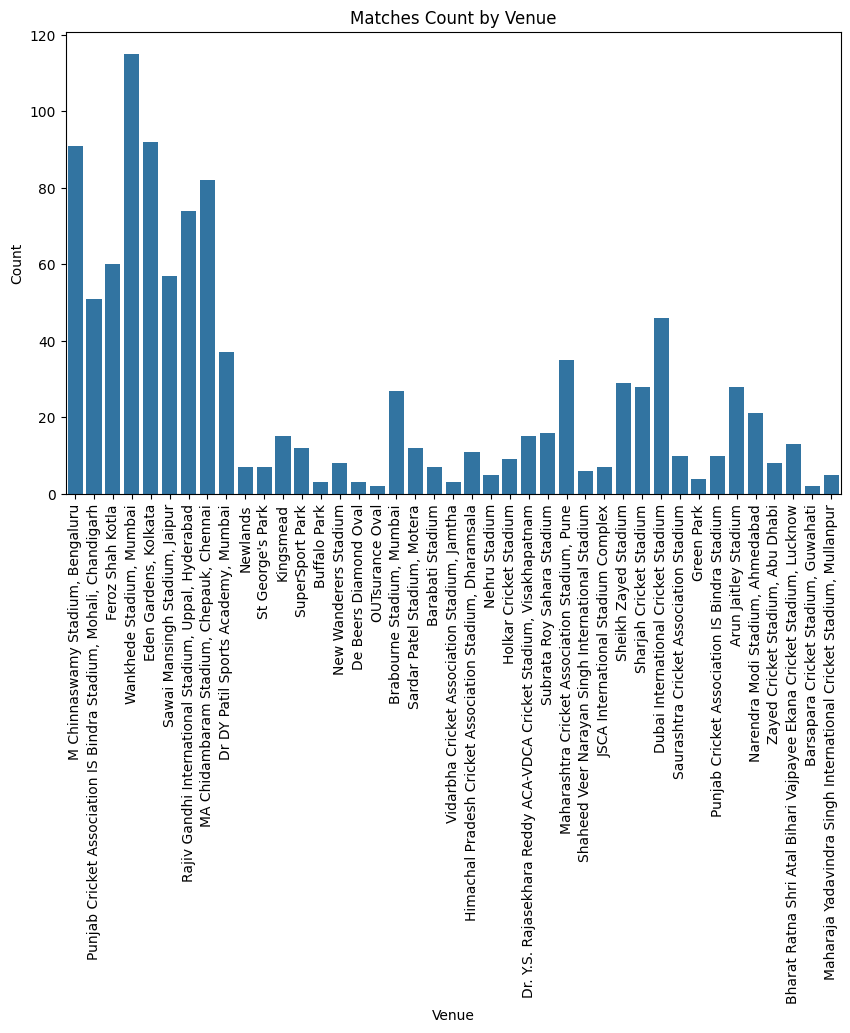

In [24]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='Venue', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()

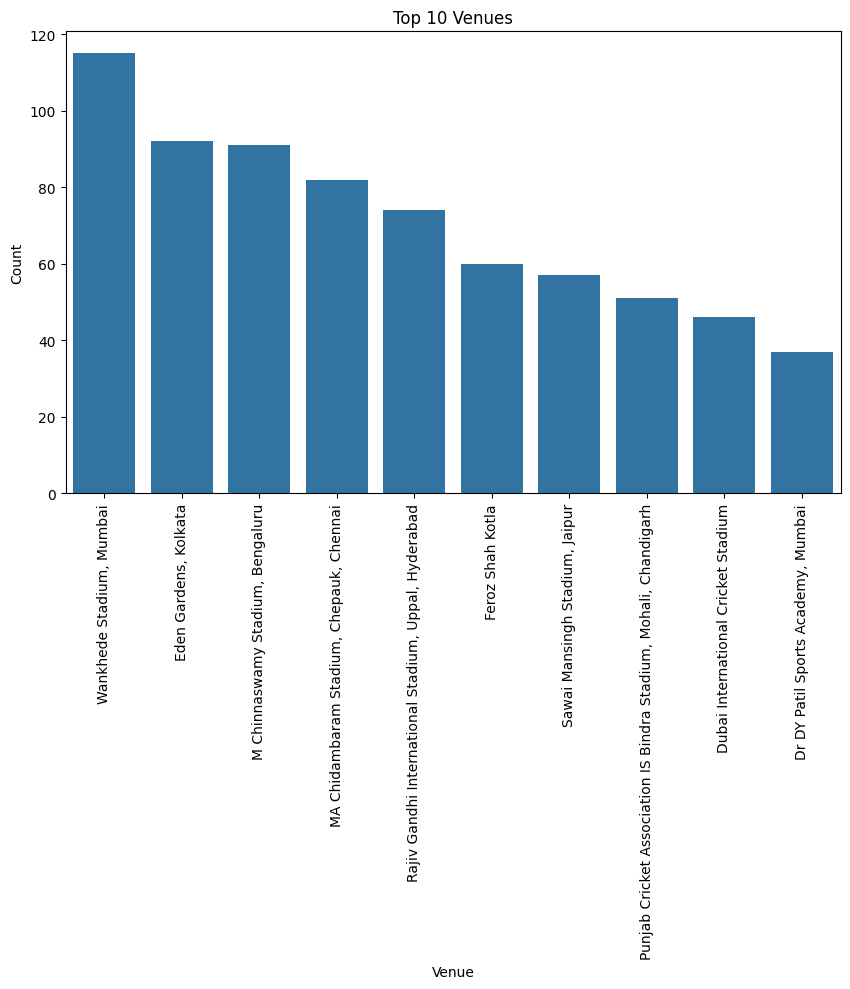

In [25]:
# Get the top 10 venues with the highest number of matches played
venue_counts = data['Venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

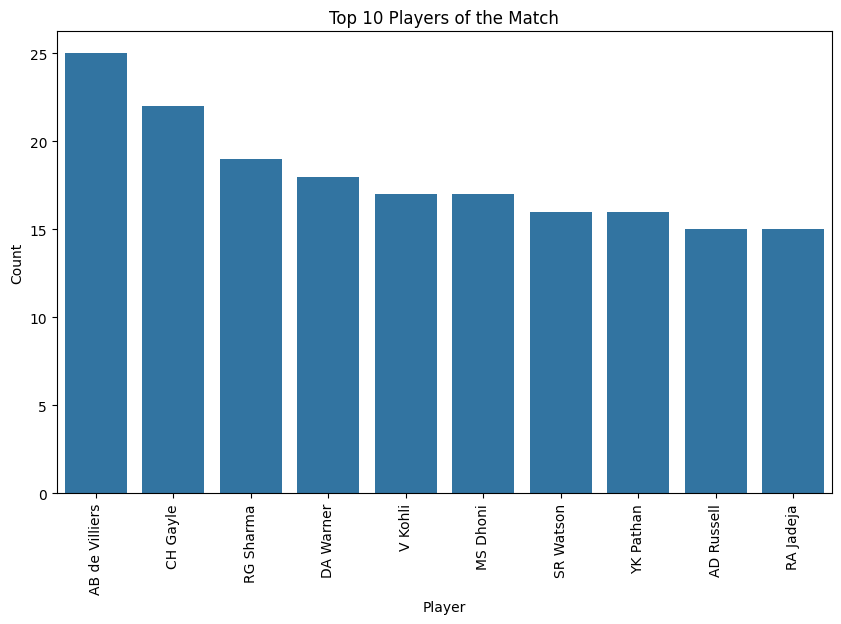

In [26]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Get the top 10 players with the highest number of "Player of the Match" awards
top_players = data['Player_of_Match'].value_counts().head(10)

# Use Seaborn's barplot to plot the count of "Player of the Match" awards for each of the top 10 players
# The 'x' parameter is set to the player names (index of top_players), and 'y' is set to the corresponding award counts (values of top_players)
sns.barplot(x=top_players.index, y=top_players.values)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Players of the Match')

# Display the plot
plt.show()


In [27]:
# Extracting day, month, and year from the 'date' column
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

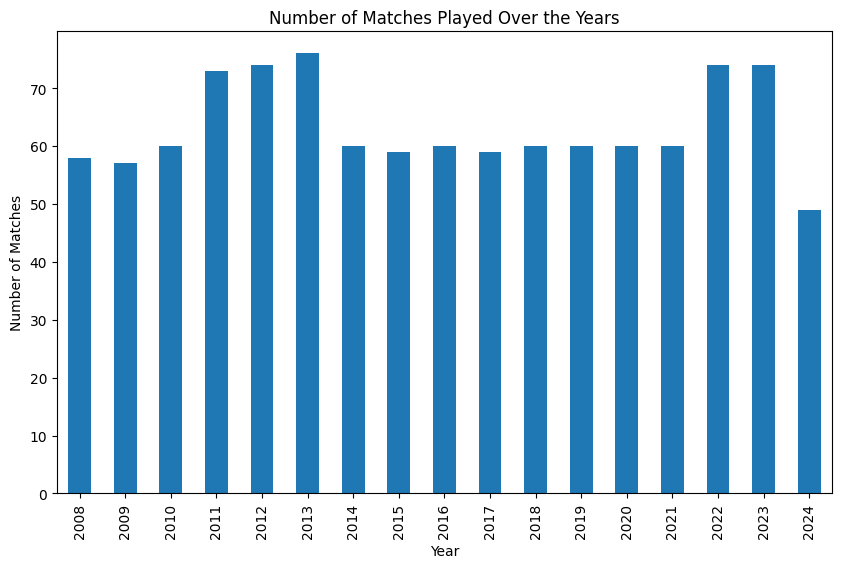

In [28]:
# Number of matches played over the years
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Years')
plt.show()

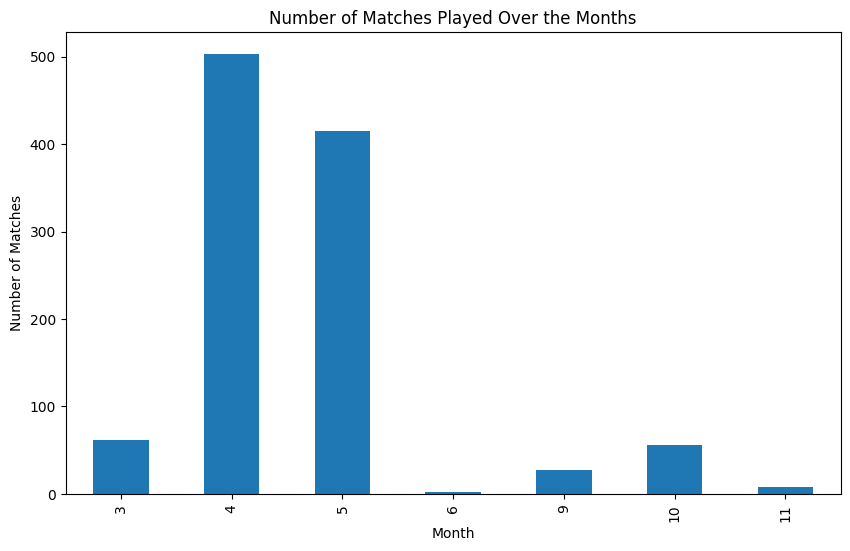

In [29]:
# Number of matches played over the months
plt.figure(figsize=(10, 6))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Months')
plt.show()

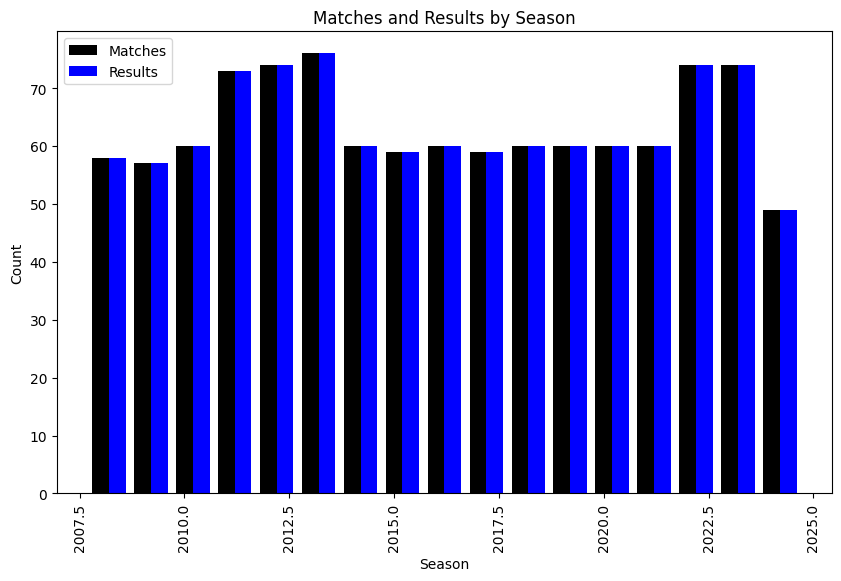

In [30]:
# Matches and Results by Season
season_matches = data['season'].value_counts()
season_results = data['Win_Type'].groupby(data['season']).value_counts().unstack(fill_value=0)

# Plotting Matches and Results by Season
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(season_matches.index, season_matches.values, width=bar_width, color='black', label='Matches')
plt.bar(season_results.index + bar_width, season_results.values.sum(axis=1), width=bar_width, color='blue', label='Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches and Results by Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()


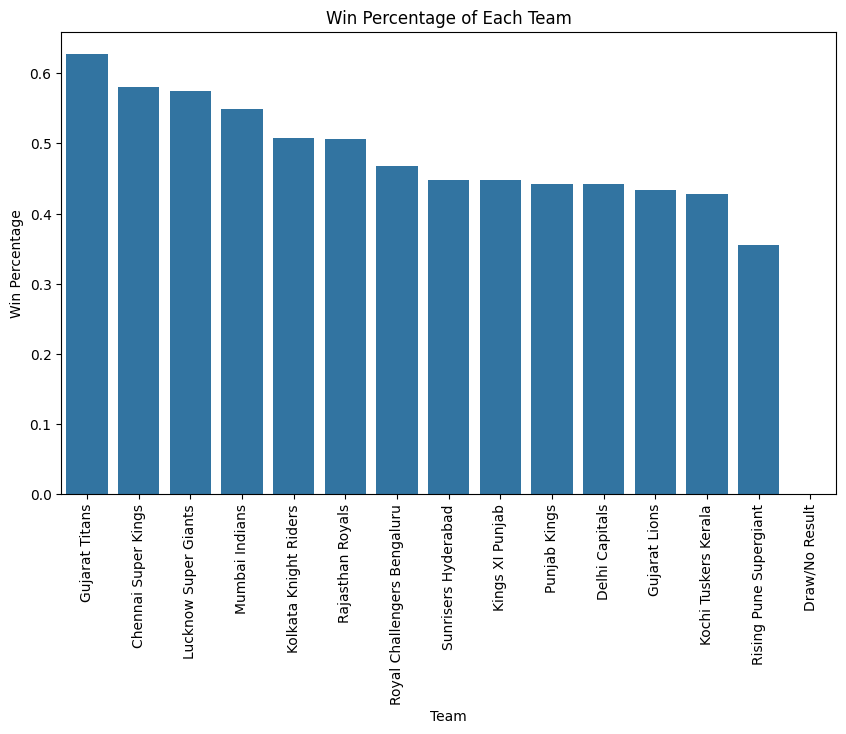

In [31]:
# Calculate win percentage for each team
team_wins = data['Match_Winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


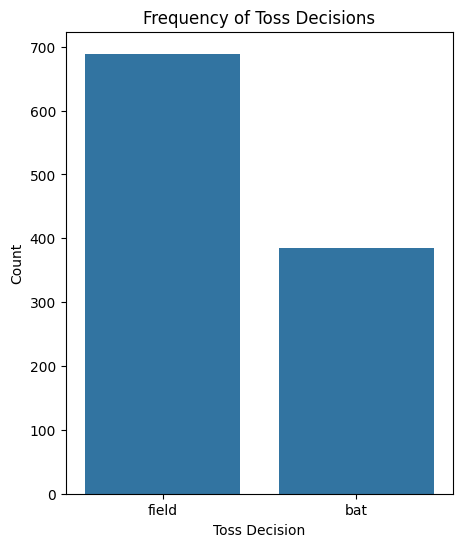

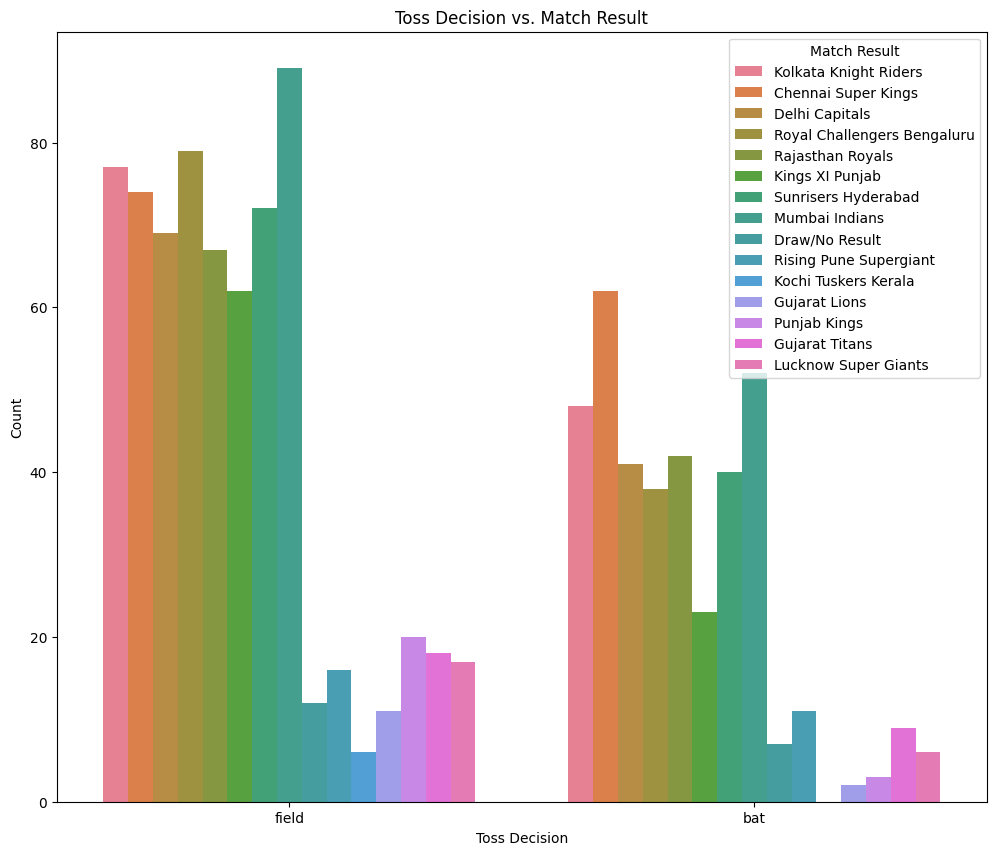

In [32]:
# Toss Decision Frequency
toss_decision_counts = data['Toss_Decision'].value_counts()

# Plot the frequency of toss decisions
plt.figure(figsize=(5, 6))
sns.countplot(x='Toss_Decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Frequency of Toss Decisions')
plt.show()

# Toss Decision vs. Match Result
plt.figure(figsize=(12, 10))
sns.countplot(x='Toss_Decision', hue='Match_Winner', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Toss Decision vs. Match Result')
plt.legend(title='Match Result', loc='upper right')
plt.show()


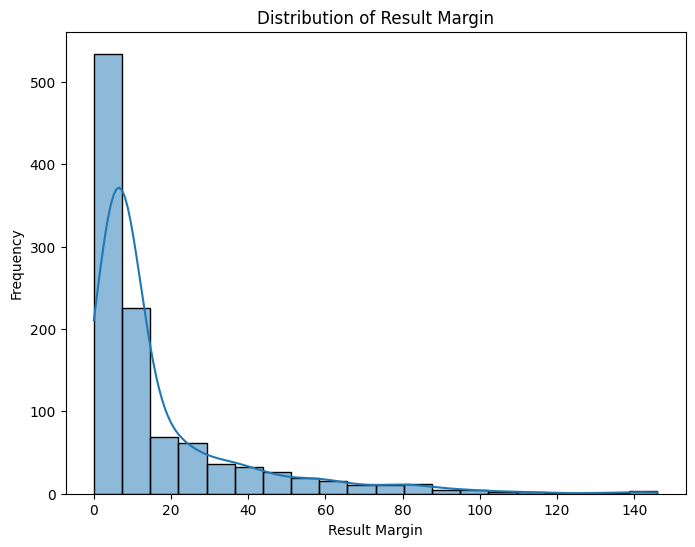

In [33]:
# Distribution of Result Margin
plt.figure(figsize=(8, 6))
sns.histplot(data['Win_Margin'], bins=20, kde=True)
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()


/var/folders/4n/xc_s34nd5ss88_wjt713hcz80000gn/T/ipykernel_754/3614476575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')


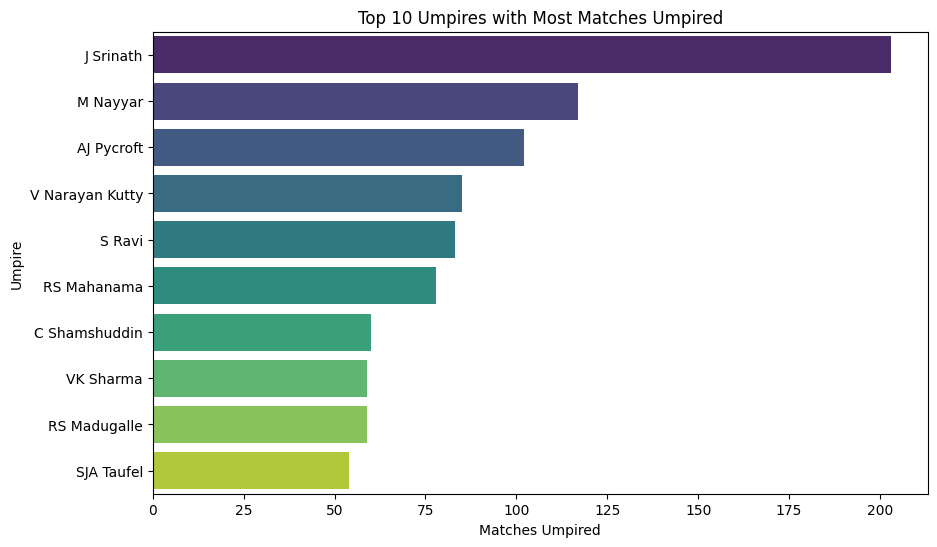

In [34]:
# Umpire-wise Analysis
umpire1_counts = data['Umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['umpire', 'matches_umpired']

umpire2_counts = data['Umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['umpire', 'matches_umpired']

# Combine counts from umpire1 and umpire2
umpire_counts = umpire1_counts.merge(umpire2_counts, on='umpire', how='outer')
umpire_counts['matches_umpired'] = umpire_counts['matches_umpired_x'].fillna(0) + umpire_counts['matches_umpired_y'].fillna(0)
umpire_counts = umpire_counts[['umpire', 'matches_umpired']]
umpire_counts = umpire_counts.sort_values(by='matches_umpired', ascending=False).head(10)

# Plotting Umpire-wise Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')
plt.xlabel('Matches Umpired')
plt.ylabel('Umpire')
plt.title('Top 10 Umpires with Most Matches Umpired')
plt.show()


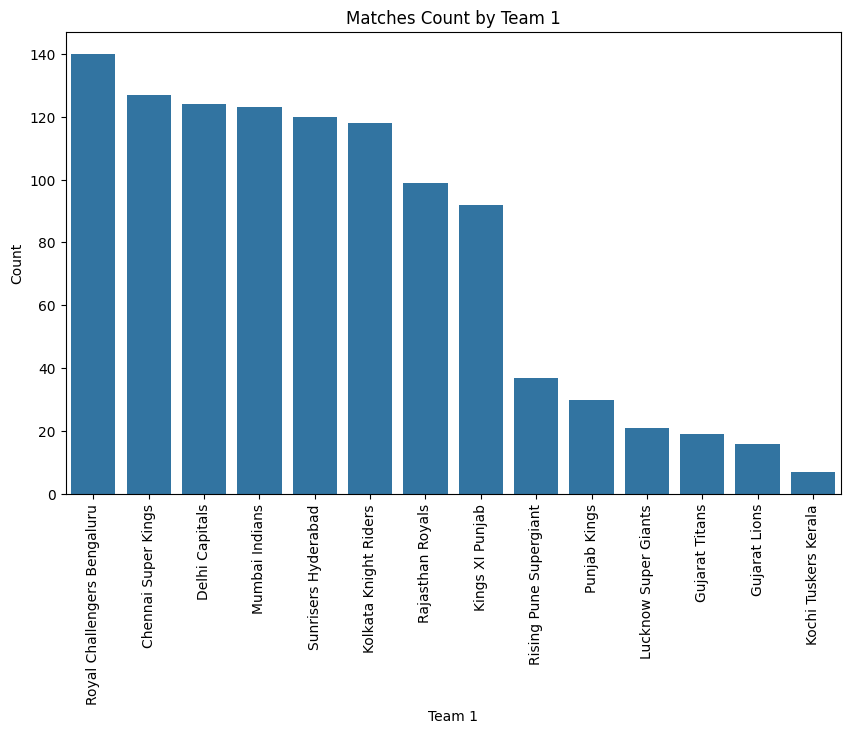

In [35]:

# Team 1
team1_counts = data['team1'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=data, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)
plt.show()

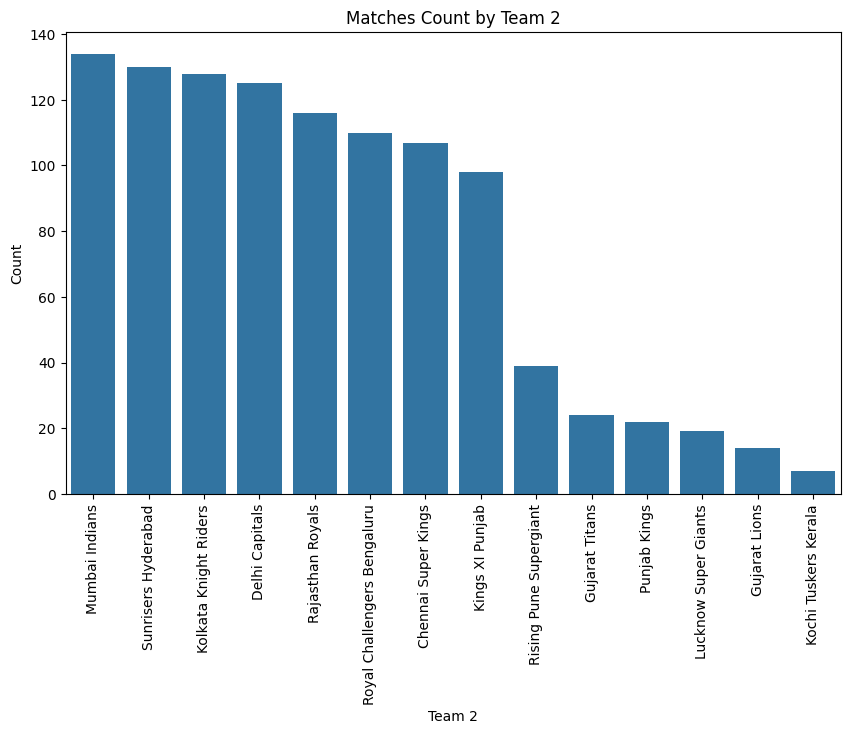

In [36]:
# Team 2
team2_counts = data['team2'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team2', data=data, order=team2_counts.index)
plt.xlabel('Team 2')
plt.ylabel('Count')
plt.title('Matches Count by Team 2')
plt.xticks(rotation=90)
plt.show()

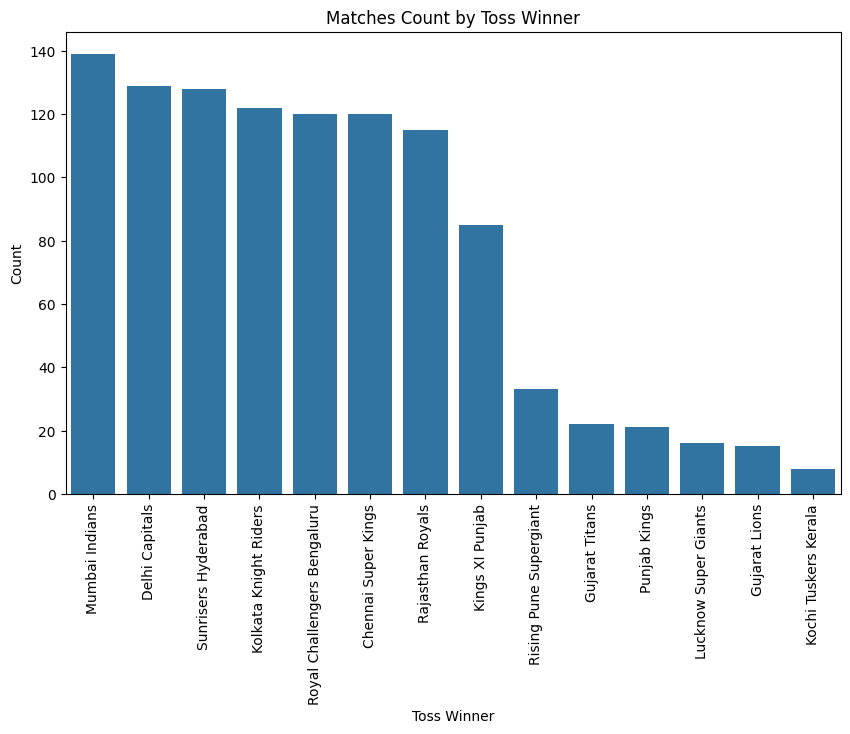

In [37]:
# Toss Winner
toss_winner_counts = data['Toss_Winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Toss_Winner', data=data, order=toss_winner_counts.index)
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.title('Matches Count by Toss Winner')
plt.xticks(rotation=90)
plt.show()

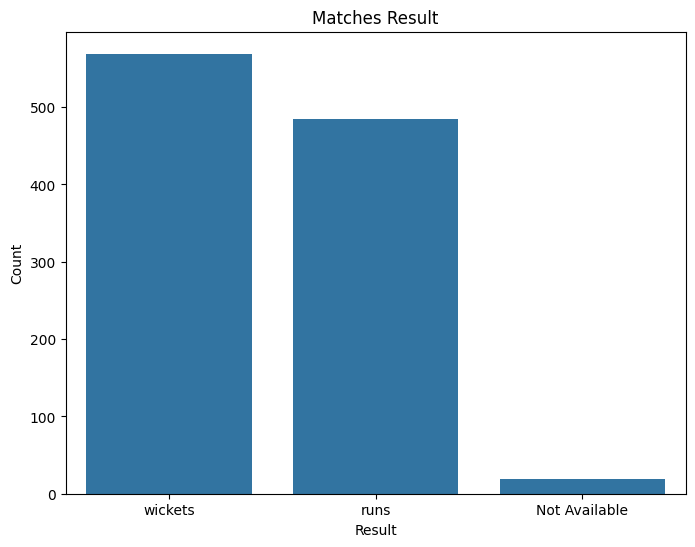

In [38]:
# Result
result_counts = data['Win_Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Win_Type', data=data, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')
plt.show()

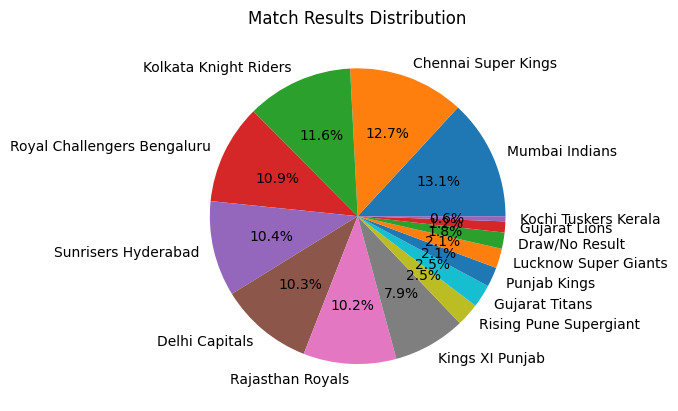

In [39]:
# Pie Chart
plt.pie(data['Match_Winner'].value_counts(), labels=data['Match_Winner'].value_counts().index, autopct='%1.1f%%')
plt.title('Match Results Distribution')
plt.show()

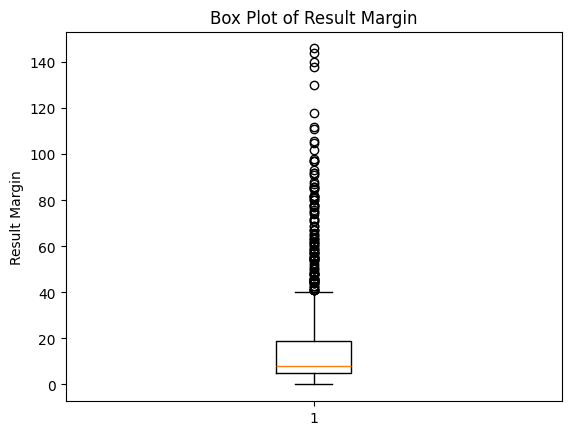

In [40]:
# Box Plot
plt.boxplot(data['Win_Margin'])
plt.ylabel('Result Margin')
plt.title('Box Plot of Result Margin')
plt.show()

In [41]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['Match_Winner'])
print(cross_tab)

Match_Winner                 Chennai Super Kings  Delhi Capitals  \
team1                                                              
Chennai Super Kings                           74               6   
Delhi Capitals                                 8              57   
Gujarat Lions                                  0               2   
Gujarat Titans                                 1               1   
Kings XI Punjab                                7               4   
Kochi Tuskers Kerala                           0               1   
Kolkata Knight Riders                         10               6   
Lucknow Super Giants                           0               1   
Mumbai Indians                                 7               5   
Punjab Kings                                   1               3   
Rajasthan Royals                               4               5   
Rising Pune Supergiant                         2               3   
Royal Challengers Bengaluru                   11

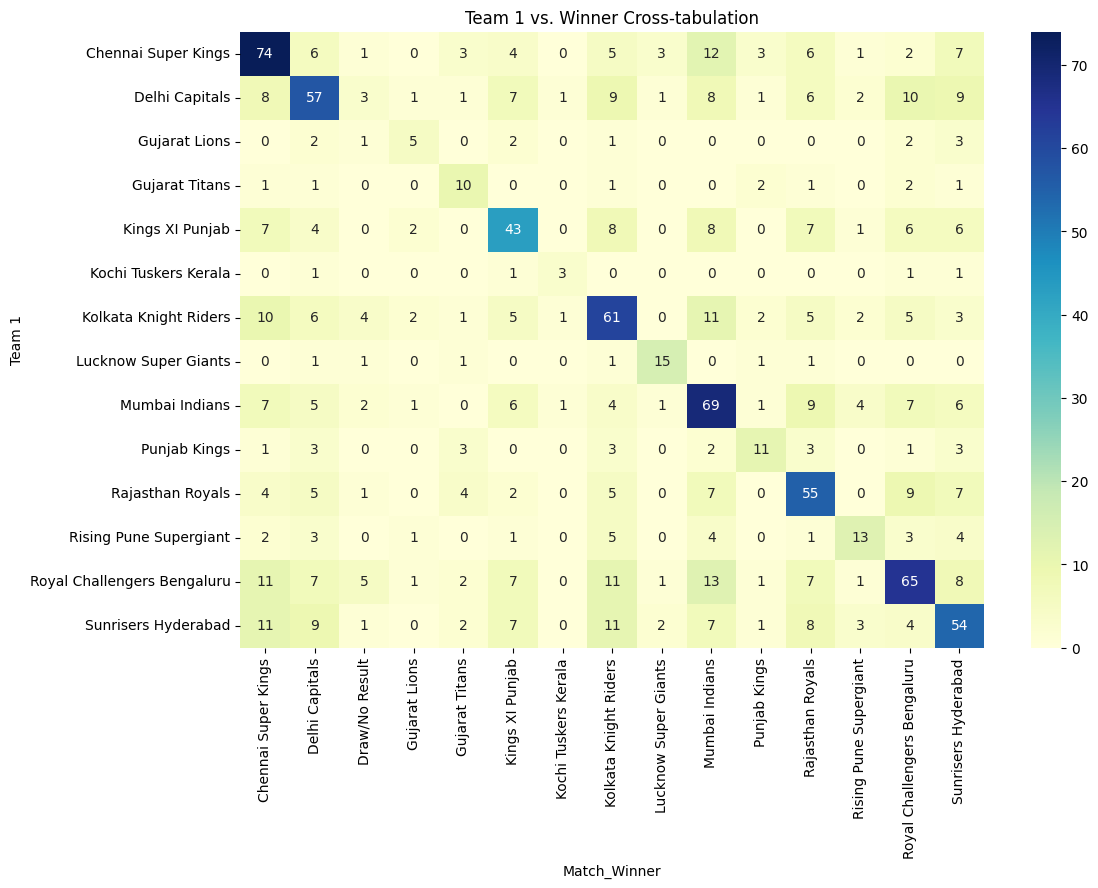

In [42]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['Match_Winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Match_Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()


# **Data Preparation**

In [43]:
# To display the columns of the data
data.columns

Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores', 'team1', 'team2', 'season', 'day', 'month',
       'year'],
      dtype='object')

In [44]:
## Get the unique venues present in the 'winner' column
data['Match_Winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Draw/No Result', 'Rising Pune Supergiant', 'Kochi Tuskers Kerala',
       'Gujarat Lions', 'Punjab Kings', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [45]:
# Create a dictionary to map team names to unique numbers

team_mapping = {
    'Draw/No Result' :0,
    'Kolkata Knight Riders' : 1,
    'Chennai Super Kings' : 2,
    'Delhi Capitals' : 3,
    'Rajasthan Royals' : 4,
    'Kings XI Punjab' : 5,
    'Sunrisers Hyderabad' : 6,
    'Mumbai Indians': 7,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11,
    'Punjab Kings' : 12,
    'Gujarat Titans' : 13,
    'Lucknow Super Giants' : 14,
    'Royal Challengers Bengaluru' : 15
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['Match_Winner'] = data['Match_Winner'].map(team_mapping)
data['Toss_Winner'] = data['Toss_Winner'].map(team_mapping)

data

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,...,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,team1,team2,season,day,month,year
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,"M Chinnaswamy Stadium, Bengaluru",15,field,1,runs,140.0,222,...,J Srinath,61,97,64,15,1,2008,18,4,2008
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",2,bat,2,runs,33.0,240,...,S Venkataraghavan,53,116,71,5,2,2008,19,4,2008
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,4,bat,3,wickets,9.0,129,...,GR Viswanath,40,66,23,3,4,2008,19,4,2008
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",7,bat,15,wickets,5.0,165,...,J Srinath,47,71,47,7,15,2008,20,4,2008
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,"Eden Gardens, Kolkata",6,bat,1,wickets,5.0,110,...,FM Engineer,39,43,28,1,6,2008,20,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1426283,2024-04-28,Gujarat Titans vs Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",15,field,15,wickets,9.0,200,...,J Srinath,42,106,52,13,15,2024,28,4,2024
1069,1426284,2024-04-28,Chennai Super Kings vs Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",6,field,2,runs,78.0,212,...,Sanjay Verma,50,109,53,2,6,2024,28,4,2024
1070,1426285,2024-04-29,Delhi Capitals vs Kolkata Knight Riders,"Eden Gardens, Kolkata",3,bat,1,wickets,7.0,153,...,V Narayan Kutty,67,61,25,3,1,2024,29,4,2024
1071,1426286,2024-04-30,Mumbai Indians vs Lucknow Super Giants,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,14,field,14,wickets,4.0,144,...,DS Manohar,28,78,38,7,14,2024,30,4,2024



We create a dictionary team_mapping where each team name is mapped to a corresponding unique number. Then, we use the map function in Pandas to replace the team names in the 'team1', 'team2', 'winner', and 'toss_winner' columns with their respective unique numerical values.

In [46]:
# Get the unique venues present in the 'venue' column
data['Venue'].unique()

array(['M Chinnaswamy Stadium, Bengaluru',
       'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
       'Feroz Shah Kotla', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata', 'Sawai Mansingh Stadium, Jaipur',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Dr DY Patil Sports Academy, Mumbai', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium, Mumbai',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Nehru Stadium', 'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium, Pune',
  

In [47]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['Venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['Venue'] = data['Venue'].map(venue_mapping)

In [48]:
# Get the unique venues present in the 'toss_decsion' column
data['Toss_Decision'].unique()

array(['field', 'bat'], dtype=object)

In [49]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['Toss_Decision'] = data['Toss_Decision'].map(temp)

In [50]:
# Create a set of unique umpires
umpires_set = set(data['Umpire1'].unique()).union(set(data['Umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['Umpire1'] = data['Umpire1'].map(umpire_dict)
data['Umpire2'] = data['Umpire2'].map(umpire_dict)
data['Umpire'] = data['Umpire'].map(umpire_dict)


In [51]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['Player_of_Match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['Player_of_Match'] = data['Player_of_Match'].map(player_of_match_mapping)

In [52]:
# to display our data
data.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,...,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,team1,team2,season,day,month,year
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,0,15,0,1,runs,140.0,222,...,7,61,97,64,15,1,2008,18,4,2008
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,1,2,1,2,runs,33.0,240,...,69,53,116,71,5,2,2008,19,4,2008
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,2,4,1,3,wickets,9.0,129,...,70,40,66,23,3,4,2008,19,4,2008
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,3,7,1,15,wickets,5.0,165,...,7,47,71,47,7,15,2008,20,4,2008
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,4,6,1,1,wickets,5.0,110,...,91,39,43,28,1,6,2008,20,4,2008


In [53]:
# List of unwanted columns
unwanted_columns = ['Match_ID','Date','Teams','Umpire','Win_Type','season','day','month','year', "Player_of_Match"]

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)
data.columns


Index(['Venue', 'Toss_Winner', 'Toss_Decision', 'Match_Winner', 'Win_Margin',
       'First_Innings_Score', 'Second_Innings_Score', 'Umpire1', 'Umpire2',
       'Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores',
       'team1', 'team2'],
      dtype='object')

In [54]:
data.head()

,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Margin,First_Innings_Score,Second_Innings_Score,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,team1,team2
0,0,15,0,1,140.0,222,82.0,24,7,61,97,64,15,1
1,1,2,1,2,33.0,240,207.0,86,69,53,116,71,5,2
2,2,4,1,3,9.0,129,132.0,2,70,40,66,23,3,4
3,3,7,1,15,5.0,165,166.0,85,7,47,71,47,7,15
4,4,6,1,1,5.0,110,112.0,25,91,39,43,28,1,6


# **Splitting our data**

In [55]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['Match_Winner'], axis=1)
y = data['Match_Winner']

In [56]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (858, 13)
y_train shape: (858,)
X_test shape: (215, 13)
y_test shape: (215,)


In [57]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [58]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_



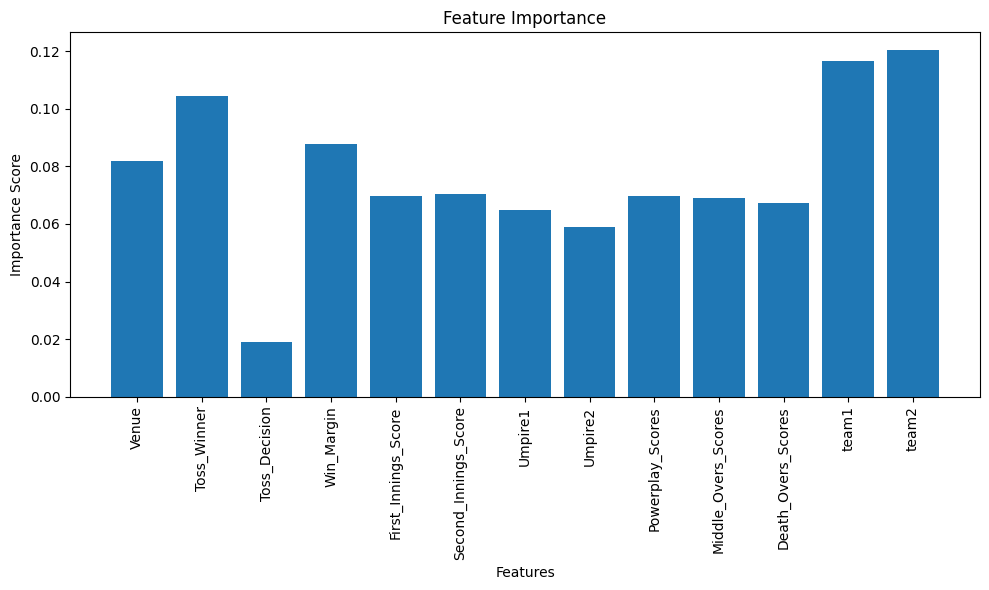

In [59]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


# **Training using Different Models (Comparative Analysis)**

### **1. SVM**

In [60]:
accuracy_dict = dict()
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

SVC()

In [61]:
# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['SVM'] = accuracy
print("Accuracy:", accuracy)

Accuracy: 0.12558139534883722


### **2. Logistic Regression**

In [62]:
# Initialize the logistic regression model
lr = LogisticRegression(max_iter=1000)


# Train the model on the training data
lr.fit(X_train, y_train)

/Users/ravi/UNI/ML-Trott/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [63]:
# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['Logistic Regression'] = accuracy
print("Accuracy:", accuracy)

Accuracy: 0.26976744186046514


### **3. Random Forest**

In [64]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [65]:
# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['Random Forest'] = accuracy
print("Accuracy:", accuracy)

fis = dt.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), fis, align='center')
plt.title('Feature Importance for Decision Tree')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

NameError: name 'dt' is not defined

### **3. Decision Tree**

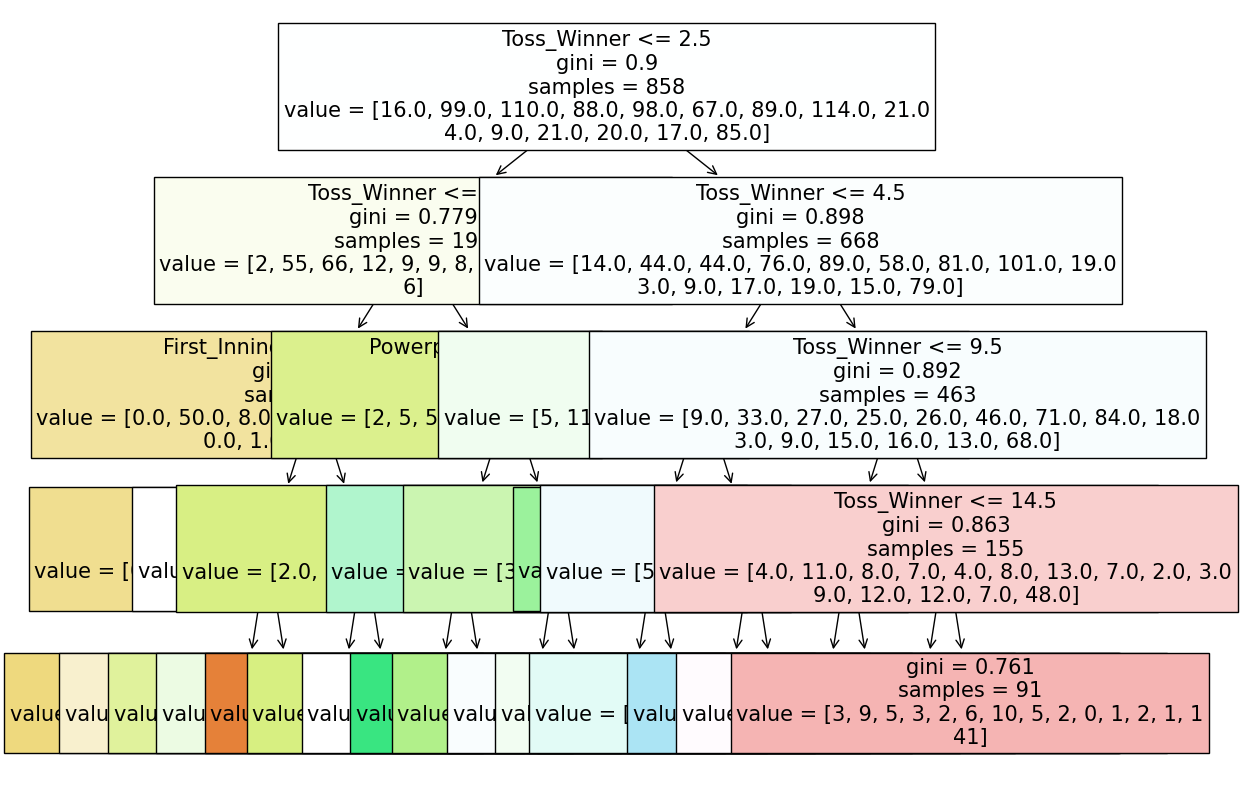

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt =DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)


plt.figure(figsize=(10,10))
plot_tree(dt, feature_names=X.columns, filled=True, fontsize=15)
plt.show()



Accuracy: 0.4697674418604651


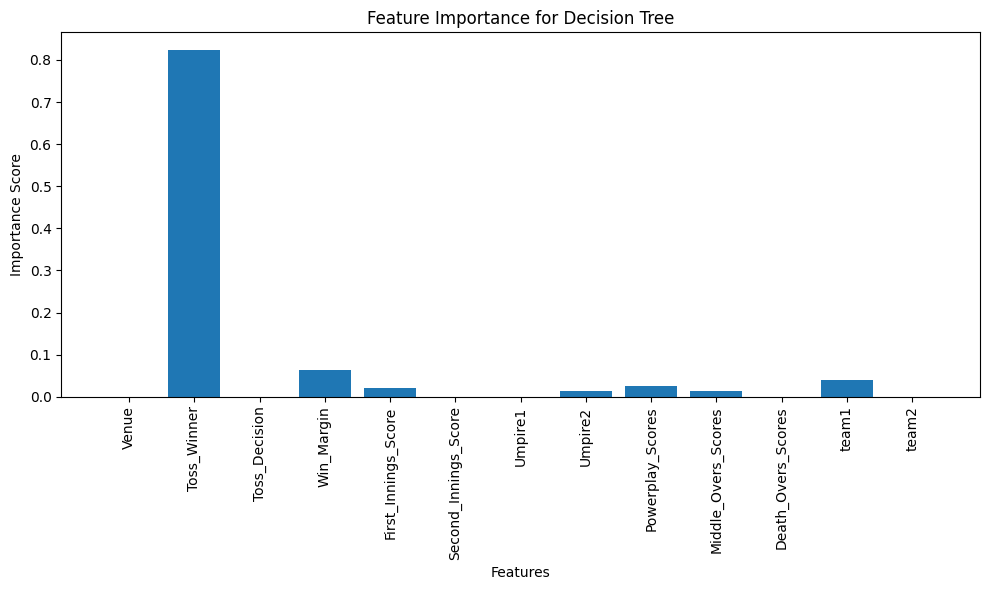

In [ ]:
# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['Decision Tree'] = accuracy
print("Accuracy:", accuracy)

fis = dt.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), fis, align='center')
plt.title('Feature Importance for Decision Tree')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### **4. XGBoostClassifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import time
from xgboost import XGBClassifier


le = LabelEncoder()
y_train = le.fit_transform(y_train)

start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time.time() - start_time)



Fit time :  1.1560230255126953


Accuracy: 0.4930232558139535


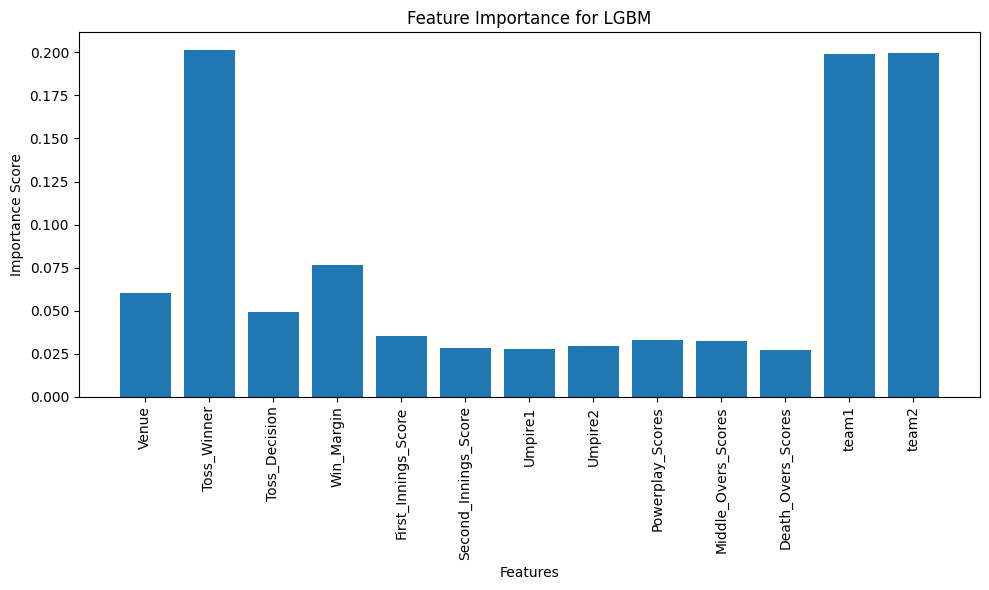

In [ ]:
# Make predictions on the testing data
y_pred = xgb.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['XGBoost'] = accuracy
print("Accuracy:", accuracy)

fis = xgb.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), fis, align='center')
plt.title('Feature Importance for LGBM')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### **5. LGBMClassifier**

In [ ]:
# Create an instance of the LGBMClassifier model
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=20,        
    max_depth=-1,        
    learning_rate=0.1,
    force_col_wise=True,
    n_estimators=100            
)


# Fit the model on the training data
start_time = time.time()
model.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 858, number of used features: 13
[LightGBM] [Info] Start training from score -3.982015
[LightGBM] [Info] Start training from score -2.159484
[LightGBM] [Info] Start training from score -2.054124
[LightGBM] [Info] Start training from score -2.277267
[LightGBM] [Info] Start training from score -2.169637
[LightGBM] [Info] Start training from score -2.549911
[LightGBM] [Info] Start training from score -2.265968
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -3.710082
[LightGBM] [Info] Start training from score -5.368310
[LightGBM] [Info] Start training from score -4.557380
[LightGBM] [Info] Start training from score -3.710082
[LightGBM] [Info] Start training from score -3.758872
[LightGBM] [Info] Start training from score -3.921391
[LightGBM] [Info] Start training from score -2.311953
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy: 0.4604651162790698


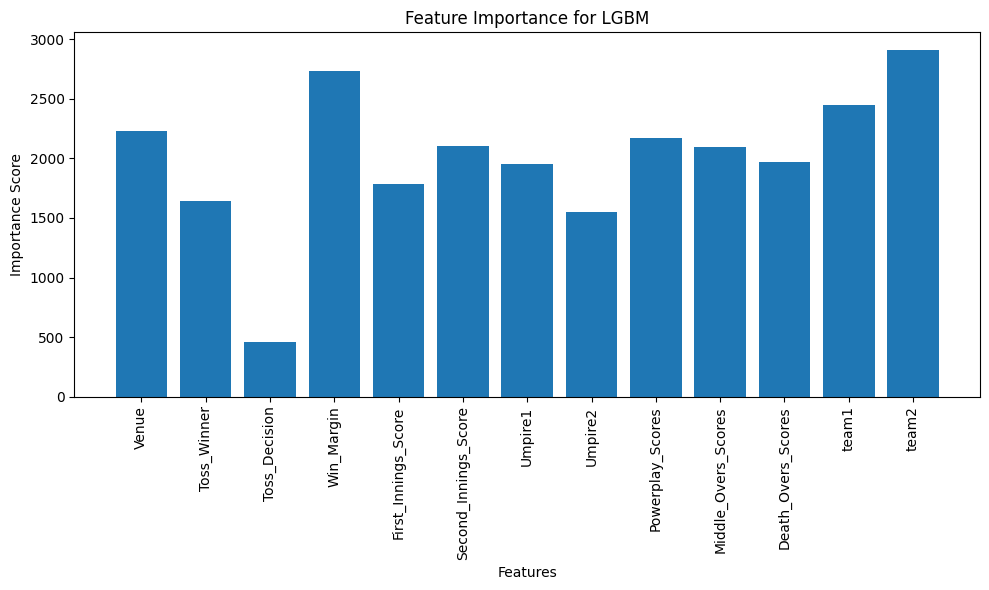

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
accuracy_dict['LightGBM'] = accuracy
print("Accuracy:", accuracy)

fis = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), fis, align='center')
plt.title('Feature Importance for LGBM')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

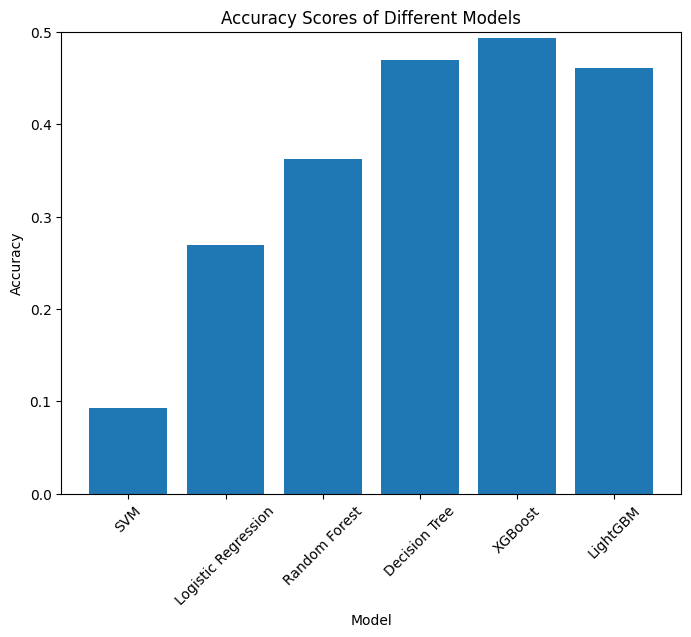

In [ ]:

# Extracting the model names and accuracy scores
models = list(accuracy_dict.keys())
scores = list(accuracy_dict.values())

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(models, scores)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)  # Set the y-axis limits between 0 and 1
plt.show()
